# Song Recommender 


[DEMO](#DEMO)

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import pprint


In [2]:
url = 'https://www.billboard.com/charts/hot-100'
page = requests.get(url)
page.status_code

200

In [3]:
#### jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

SyntaxError: invalid syntax (<ipython-input-3-d3bfc748244a>, line 1)

In [4]:
soup = BeautifulSoup(page.content, 'html.parser')
soup

<!DOCTYPE html>

<html class="" lang="">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, user-scalable=no" name="viewport"/>
<title>The Hot 100 Chart | Billboard</title>
<meta content="The Hot 100 Chart" name="title" property="title">
<meta content="@billboard" name="twitter:site"/>
<meta content="Billboard" property="og:site_name">
<meta content="article" property="og:type">
<link href="/manifest.json" rel="manifest"/>
<style>
        .chart-pro-access {
            background-image: url('https://www.billboard.com/assets/1623447255/images/piano/chart-pro-access-mb.png?298ea2b41e1d5ee8dd92');
        }

        @media (min-width: 769px) {
            .chart-pro-access {
                background-image: url('https://www.billboard.com/assets/1623447255/images/piano/chart-pro-access-dk.png?298ea2b41e1d5ee8dd92');
            }
        }
    </style>
<script async="async" data-cfasync="false" src="ht

In [6]:
song_list = soup.find_all("span", {"class":"chart-element__information__song text--truncate color--primary"})

song_name = [elem.get_text() for elem in song_list]

In [8]:

artist_list = soup.find_all("span", {"class":"chart-element__information__artist text--truncate color--secondary"})

artist_name = [elem.get_text() for elem in artist_list]
artist_name

['BTS',
 'Olivia Rodrigo',
 'Dua Lipa Featuring DaBaby',
 'Justin Bieber Featuring Daniel Caesar & Giveon',
 'Silk Sonic (Bruno Mars & Anderson .Paak)',
 'The Weeknd & Ariana Grande',
 'Doja Cat Featuring SZA',
 'Masked Wolf',
 'Olivia Rodrigo',
 'Bad Bunny',
 'Lil Nas X',
 'The Kid LAROI',
 'Luke Combs',
 'Polo G',
 'The Weeknd',
 'Lil Baby, Lil Durk & Travis Scott',
 'Olivia Rodrigo',
 'Maroon 5 Featuring Megan Thee Stallion',
 'Olivia Rodrigo',
 'Roddy Ricch',
 'Lil Baby & Lil Durk',
 'Saweetie Featuring Doja Cat',
 'Giveon',
 'Glass Animals',
 'Lil Tjay Featuring 6LACK',
 'Olivia Rodrigo',
 'Billie Eilish',
 'Olivia Rodrigo',
 'Cardi B',
 '24kGoldn Featuring iann dior',
 'Lil Baby & Lil Durk',
 'DJ Khaled Featuring Lil Baby & Lil Durk',
 'Kali Uchis',
 'Lil Baby & Lil Durk',
 'Olivia Rodrigo',
 'Moneybagg Yo',
 'Drake Featuring Lil Baby',
 'Chris Young + Kane Brown',
 'Ariana Grande',
 'Dierks Bentley',
 'SpotemGottem Featuring Pooh Shiesty Or DaBaby',
 'Machine Gun Kelly X blackbe

In [44]:
dict_df = {'Song': song_name, 'Artist': artist_name}
top100_df = pd.DataFrame.from_dict(dict_df)
top100_df

Song  \
0                              Butter   
1                            Good 4 U   
2                          Levitating   
3                             Peaches   
4                 Leave The Door Open   
..                                ...   
95           Things A Man Oughta Know   
96                      Country Again   
97  Drunk (And I Don't Wanna Go Home)   
98                     If You Want To   
99                       Seeing Green   

                                            Artist  
0                                              BTS  
1                                   Olivia Rodrigo  
2                        Dua Lipa Featuring DaBaby  
3   Justin Bieber Featuring Daniel Caesar & Giveon  
4         Silk Sonic (Bruno Mars & Anderson .Paak)  
..                                             ...  
95                                   Lainey Wilson  
96                                    Thomas Rhett  
97                     Elle King & Miranda Lambert  
98                             Lil Baby & Lil Durk  
99                  Nicki Minaj, Drake & Lil Wayne  

[100 rows x 2 columns]

In [81]:
top100_songs = top100_df['Song'].to_list()
top100_artists = top100_df['Artist'].to_list()
top100_songs[0]



'Butter'

In [39]:
!pip install spotipy

In [73]:
import spotipy
import json


from spotipy import SpotifyClientCredentials
from credentials import Client_ID, Client_Secret




sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= Client_ID,
                                                           client_secret= Client_Secret))

In [458]:
song_uri = []
for i in top100_songs:
    results = sp.search(q = i, limit = 5)
    song_uri.append(results['tracks']['items'][0]['uri'])
    #pprint.pprint(results)
    
    #song_ids = results['tracks']['items'][0]['id']
    #song_ids

In [461]:
#len(song_uri)
#song_uri

In [89]:
#audio_feat = []# la funcion sp.audio_features acepta listas de  un maximo de 100  de len
#for i in range(0,10000, 100):
#    print(i)
#    audio_feat.append(sp.audio_features(uris[i:i+100])) # uris is list for uris in playlist spoti#

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900


In [459]:
top100_audio_df = pd.DataFrame(sp.audio_features(song_uri))
top100_audio_df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0          0.759   0.459    8    -5.187     1       0.0948       0.00323   
1          0.556   0.661    6    -5.052     0       0.2040       0.30000   
2          0.702   0.825    6    -3.787     0       0.0601       0.00883   
3          0.677   0.696    0    -6.181     1       0.1190       0.32100   
4          0.586   0.616    5    -7.964     1       0.0324       0.18200   
..           ...     ...  ...       ...   ...          ...           ...   
95         0.659   0.683    3    -5.623     1       0.0312       0.51300   
96         0.467   0.481    2    -6.947     1       0.0255       0.22700   
97         0.612   0.884    5    -4.400     1       0.0459       0.00516   
98         0.795   0.599    6    -7.819     1       0.1230       0.04140   
99         0.573   0.867    5    -2.876     0       0.1680       0.08530   

    instrumentalness  liveness  valence    tempo            type  \
0           0.000000    0.0906    0.695  109.997  audio_features   
1           0.000000    0.1010    0.668  168.560  audio_features   
2           0.000000    0.0674    0.915  102.977  audio_features   
3           0.000000    0.4200    0.464   90.030  audio_features   
4           0.000000    0.0927    0.719  148.088  audio_features   
..               ...       ...      ...      ...             ...   
95          0.000005    0.1330    0.397  139.931  audio_features   
96          0.000189    0.1100    0.248  147.886  audio_features   
97          0.000000    0.0997    0.626  119.991  audio_features   
98          0.000000    0.1930    0.351   97.033  audio_features   
99          0.000000    0.3800    0.231   74.861  audio_features   

                        id                                   uri  \
0   2bgTY4UwhfBYhGT4HUYStN  spotify:track:2bgTY4UwhfBYhGT4HUYStN   
1   6PERP62TejQjgHu81OHxgM  spotify:track:6PERP62TejQjgHu81OHxgM   
2   463CkQjx2Zk1yXoBuierM9  spotify:track:463CkQjx2Zk1yXoBuierM9   
3   4iJyoBOLtHqaGxP12qzhQI  spotify:track:4iJyoBOLtHqaGxP12qzhQI   
4   7MAibcTli4IisCtbHKrGMh  spotify:track:7MAibcTli4IisCtbHKrGMh   
..                     ...                                   ...   
95  5QS8PNEWbqTEZyQ6e9ZbJf  spotify:track:5QS8PNEWbqTEZyQ6e9ZbJf   
96  3CiF9D8iuVhZWDvvjf8HpG  spotify:track:3CiF9D8iuVhZWDvvjf8HpG   
97  0QULNNd9z5s35entfiiXoa  spotify:track:0QULNNd9z5s35entfiiXoa   
98  1EXRmdtTA2IEnYGiuw9plD  spotify:track:1EXRmdtTA2IEnYGiuw9plD   
99  1TZv3bujNaYz646eezRE91  spotify:track:1TZv3bujNaYz646eezRE91   

                                           track_href  \
0   https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...   
1   https://api.spotify.com/v1/tracks/6PERP62TejQj...   
2   https://api.spotify.com/v1/tracks/463CkQjx2Zk1...   
3   https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...   
4   https://api.spotify.com/v1/tracks/7MAibcTli4Ii...   
..                                                ...   
95  https://api.spotify.com/v1/tracks/5QS8PNEWbqTE...   
96  https://api.spotify.com/v1/tracks/3CiF9D8iuVhZ...   
97  https://api.spotify.com/v1/tracks/0QULNNd9z5s3...   
98  https://api.spotify.com/v1/tracks/1EXRmdtTA2IE...   
99  https://api.spotify.com/v1/tracks/1TZv3bujNaYz...   

                                         analysis_url  duration_ms  \
0   https://api.spotify.com/v1/audio-analysis/2bgT...       164442   
1   https://api.spotify.com/v1/audio-analysis/6PER...       178148   
2   https://api.spotify.com/v1/audio-analysis/463C...       203064   
3   https://api.spotify.com/v1/audio-analysis/4iJy...       198082   
4   https://api.spotify.com/v1/audio-analysis/7MAi...       242096   
..                                                ...          ...   
95  https://api.spotify.com/v1/audio-analysis/5QS8...       203373   
96  https://api.spotify.com/v1/audio-analysis/3CiF...       221240   
97  https://api.spotify.com/v1/audio-analysis/0QUL...       245626   
98  https://api.spotify.com/v1/audio-analysis/1EXR...       195454   
99

In [118]:
top100_info_df = pd.concat([top100_df, top100_audio_df], axis = 1)
top100_info_df

Song  \
0                              Butter   
1                            Good 4 U   
2                          Levitating   
3                             Peaches   
4                 Leave The Door Open   
..                                ...   
95           Things A Man Oughta Know   
96                      Country Again   
97  Drunk (And I Don't Wanna Go Home)   
98                     If You Want To   
99                       Seeing Green   

                                            Artist  danceability  energy  key  \
0                                              BTS         0.759   0.459    8   
1                                   Olivia Rodrigo         0.556   0.661    6   
2                        Dua Lipa Featuring DaBaby         0.702   0.825    6   
3   Justin Bieber Featuring Daniel Caesar & Giveon         0.677   0.696    0   
4         Silk Sonic (Bruno Mars & Anderson .Paak)         0.586   0.616    5   
..                                             ...           ...     ...  ...   
95                                   Lainey Wilson         0.659   0.683    3   
96                                    Thomas Rhett         0.467   0.481    2   
97                     Elle King & Miranda Lambert         0.612   0.884    5   
98                             Lil Baby & Lil Durk         0.795   0.599    6   
99                  Nicki Minaj, Drake & Lil Wayne         0.573   0.867    5   

    loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0     -5.187     1       0.0948       0.00323          0.000000    0.0906   
1     -5.052     0       0.2040       0.30000          0.000000    0.1010   
2     -3.787     0       0.0601       0.00883          0.000000    0.0674   
3     -6.181     1       0.1190       0.32100          0.000000    0.4200   
4     -7.964     1       0.0324       0.18200          0.000000    0.0927   
..       ...   ...          ...           ...               ...       ...   
95    -5.623     1       0.0312       0.51300          0.000005    0.1330   
96    -6.947     1       0.0255       0.22700          0.000189    0.1100   
97    -4.400     1       0.0459       0.00516          0.000000    0.0997   
98    -7.819     1       0.1230       0.04140          0.000000    0.1930   
99    -2.876     0       0.1680       0.08530          0.000000    0.3800   

    valence    tempo            type                      id  \
0     0.695  109.997  audio_features  2bgTY4UwhfBYhGT4HUYStN   
1     0.668  168.560  audio_features  6PERP62TejQjgHu81OHxgM   
2     0.915  102.977  audio_features  463CkQjx2Zk1yXoBuierM9   
3     0.464   90.030  audio_features  4iJyoBOLtHqaGxP12qzhQI   
4     0.719  148.088  audio_features  7MAibcTli4IisCtbHKrGMh   
..      ...      ...             ...                     ...   
95    0.397  139.931  audio_features  5QS8PNEWbqTEZyQ6e9ZbJf   
96    0.248  147.886  audio_features  3CiF9D8iuVhZWDvvjf8HpG   
97    0.626  119.991  audio_features  0QULNNd9z5s35entfiiXoa   
98    0.351   97.033  audio_features  1EXRmdtTA2IEnYGiuw9plD   
99    0.231   74.861  audio_features  1TZv3bujNaYz646eezRE91   

                                     uri  \
0   spotify:track:2bgTY4UwhfBYhGT4HUYStN   
1   spotify:track:6PERP62TejQjgHu81OHxgM   
2   spotify:track:463CkQjx2Zk1yXoBuierM9   
3   spotify:track:4iJyoBOLtHqaGxP12qzhQI   
4   spotify:track:7MAibcTli4IisCtbHKrGMh   
..                                   ...   
95  spotify:track:5QS8PNEWbqTEZyQ6e9ZbJf   
96  spotify:track:3CiF9D8iuVhZWDvvjf8HpG   
97  spotify:track:0QULNNd9z5s35entfiiXoa   
98  spotify:track:1EXRmdtTA2IEnYGiuw9plD   
99  spotify:track:1TZv3bujNaYz646eezRE91   

                                           track_href  \
0   https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...   
1   https://api.spotify.com/v1/tracks/6PERP62TejQj...   
2   https://api.spotify.com/v1/tracks/463CkQjx2Zk1...   
3   https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...   
4   https://api.spotify.com/v1/tracks/7MAibcTli4Ii...   
..

In [76]:
#song_ids = results['tracks']['items'][0]['id']
#song_ids

'3oHLvTIiiJMQ1Hx9EPKYol'

In [58]:
#list_ids = [results['tracks']['items'][song]['id'] for song in range(0, len(top100_songs))]

IndexError: list index out of range

In [22]:
#for item in results['tracks']['items']:
#    print("The name of song is: '{}' and the id is: {}".format(item['name'],item['external_urls']['spotify']))

The name of song is: 'SHUM' and the id is: https://open.spotify.com/track/7mEDVrAHDnQJStDo8jKJJm


In [ ]:
.audio_features([URL|URI|ID])

## CREATING SPOTIFY DATAFRAME FROM A PLAYLIST

###

In [133]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [137]:
playlist = get_playlist_tracks("spotify", "4rnleEAOdmFAbRcNCgZMpY") #  THIS IS THE ID FOR LONGEST PLAYLIST P6yPiKpy7evrwvZodByKvM9

In [107]:
#def get_playlist_id():
#   playlists = sp.featured_playlists(limit=50)
#   index = 0
#   playlist_uri_list = []
#   print(len(playlists))
#   for i in playlists:
#       uri = playlists["playlists"]["items"][index]["uri"]
#       playlist_uri_list.append(uri)
#       index += 1
#   return playlist_uri_list

In [136]:
playlist = sp.featured_playlists("biggest playlist ever")
playlist["playlists"]["items"][0]["id"]

'37i9dQZF1DX4xuWVBs4FgJ'

In [93]:
type(playlist)

list

In [95]:
len(playlist)

5295

In [330]:
playlist[0]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [328]:
playlist[0]['track']['uri']

'spotify:track:7dS5EaCoMnN7DzlpT6aRn2'

In [152]:
for song in playlist: 
    print(song['track']['artists'])

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2FXC3k01G6Gw61bmprjgqS'}, 'href': 'https://api.spotify.com/v1/artists/2FXC3k01G6Gw61bmprjgqS', 'id': '2FXC3k01G6Gw61bmprjgqS', 'name': 'Hozier', 'type': 'artist', 'uri': 'spotify:artist:2FXC3k01G6Gw61bmprjgqS'}]
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2KsP6tYLJlTBvSUxnwlVWa'}, 'href': 'https://api.spotify.com/v1/artists/2KsP6tYLJlTBvSUxnwlVWa', 'id': '2KsP6tYLJlTBvSUxnwlVWa', 'name': 'Mike Posner', 'type': 'artist', 'uri': 'spotify:artist:2KsP6tYLJlTBvSUxnwlVWa'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/1Bo8Afb2Qbjs4x6kJHyjle'}, 'href': 'https://api.spotify.com/v1/artists/1Bo8Afb2Qbjs4x6kJHyjle', 'id': '1Bo8Afb2Qbjs4x6kJHyjle', 'name': 'Gigamesh', 'type': 'artist', 'uri': 'spotify:artist:1Bo8Afb2Qbjs4x6kJHyjle'}]
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/4V8LLVI7PbaPR0K2TGSxFF'}, 'href': 'https://api.spotify.com/v1/artists/4V8LLVI7PbaPR0K2TGSxFF', 'id': '

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/5tVyieWwN9j09jXUovK2zN'}, 'href': 'https://api.spotify.com/v1/artists/5tVyieWwN9j09jXUovK2zN', 'id': '5tVyieWwN9j09jXUovK2zN', 'name': 'Danny Saucedo', 'type': 'artist', 'uri': 'spotify:artist:5tVyieWwN9j09jXUovK2zN'}]
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2p4FqHnazRucYQHyDCdBrJ'}, 'href': 'https://api.spotify.com/v1/artists/2p4FqHnazRucYQHyDCdBrJ', 'id': '2p4FqHnazRucYQHyDCdBrJ', 'name': 'Simple Plan', 'type': 'artist', 'uri': 'spotify:artist:2p4FqHnazRucYQHyDCdBrJ'}]
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/6XyY86QOPPrYVGvF9ch6wz'}, 'href': 'https://api.spotify.com/v1/artists/6XyY86QOPPrYVGvF9ch6wz', 'id': '6XyY86QOPPrYVGvF9ch6wz', 'name': 'Linkin Park', 'type': 'artist', 'uri': 'spotify:artist:6XyY86QOPPrYVGvF9ch6wz'}]
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/37NqXwtb6nIEqRt4EJSoIO'}, 'href': 'https://api.spotify.com/v1/artists/37NqXwtb6nIEqRt4EJSoI

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/2ebMpthf4U0DaF5G82G92b'}, 'href': 'https://api.spotify.com/v1/artists/2ebMpthf4U0DaF5G82G92b', 'id': '2ebMpthf4U0DaF5G82G92b', 'name': 'Richi M.', 'type': 'artist', 'uri': 'spotify:artist:2ebMpthf4U0DaF5G82G92b'}]
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/14qHyPHkysC85Xs9ctPhHg'}, 'href': 'https://api.spotify.com/v1/artists/14qHyPHkysC85Xs9ctPhHg', 'id': '14qHyPHkysC85Xs9ctPhHg', 'name': 'Reset', 'type': 'artist', 'uri': 'spotify:artist:14qHyPHkysC85Xs9ctPhHg'}]
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/4Ud558Fulcd3W93W1R00MF'}, 'href': 'https://api.spotify.com/v1/artists/4Ud558Fulcd3W93W1R00MF', 'id': '4Ud558Fulcd3W93W1R00MF', 'name': "Waldo's People", 'type': 'artist', 'uri': 'spotify:artist:4Ud558Fulcd3W93W1R00MF'}]
[{'external_urls': {'spotify': 'https://open.spotify.com/artist/59jv1JLa4XNxXg7uxd04Nu'}, 'href': 'https://api.spotify.com/v1/artists/59jv1JLa4XNxXg7uxd04Nu', 'id'

In [231]:
for song in playlist: 
    print(song['track']['uri'])

spotify:track:7dS5EaCoMnN7DzlpT6aRn2
spotify:track:2V4bv1fNWfTcyRJKmej6Sj
spotify:track:7KA4W4McWYRpgf0fWsJZWB
spotify:track:3gbBpTdY8lnQwqxNCcf795
spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V
spotify:track:7wMq5n8mYSKlQIGECKUgTX
spotify:track:78W8wiUIlQ2SnWY9TVowKZ
spotify:track:2jcPoPin36hyNRSi4ZsqeB
spotify:track:2CEgGE6aESpnmtfiZwYlbV
spotify:track:0tBRo4P60DgKmg4jt48upm
spotify:track:1kAZhbcsXqfUjnVeqPywn2
spotify:track:2N2QvMYwyYHE8V4KZbbG4i
spotify:track:0ltBH1JNzSvQJPjJpvTu9B
spotify:track:5HbCnVLXRyZVxnreOPgJCK
spotify:track:4NFhtFE68cXUrfbne8JE2c
spotify:track:5HE3z4Ew7wZ91l3ZOpGKa4
spotify:track:5L9THbmMKB6ZlHlMgzaXHf
spotify:track:7qUcqYzOtfZe65bednDxmz
spotify:track:0seHreoI3kwp38OlEgLLnT
spotify:track:5DcPOPPUnNhyPYbTi2aWjR
spotify:track:3bidbhpOYeV4knp8AIu8Xn
spotify:track:1HfPcQ3c2HyGeID3u1lmCa
spotify:track:6Ep6BzIOB9tz3P4sWqiiAB
spotify:track:3bC1ahPIYt1btJzSSEyyrF
spotify:track:05SBRd4fXgn8FX7bf8BCAE
spotify:track:3cHyrEgdyYRjgJKSOiOtcS
spotify:track:2iJuuzV8P9Yz0VSurttIV5
s

spotify:track:2IpGdrWvIZipmaxo1YRxw5
spotify:track:76D83dghHeE2NFedPFD4tf
spotify:track:1YkV2y6QU4zya9sonV0m8R
spotify:track:7I6DceMT3utDOHjcYCbrr4
spotify:track:4Tn2llBm1g0UlWctmgPL8Z
spotify:track:6jWEPpvM9BDr73wFOmdXtb
spotify:track:4KTtYhxFtFL7mBwnjkKfLm
spotify:track:4PSP0pZt5E6GiMK5Co47Dj
spotify:track:2aSVmht4IWGNQTIegu82Dv
spotify:track:5LYQSNHZxEA880URXFHg6h
spotify:track:4TsmezEQVSZNNPv5RJ65Ov
spotify:track:40xtweuHBkLXNMO3xCK5AZ
spotify:track:2tFgv3sLFNc088KLtjxzVa
spotify:track:6PtXobrqImYfnpIxNsJApa
spotify:track:40DoAW5uF4ZLV1VlTrEFYJ
spotify:track:4nWn9o7NTpuqzHQ5hyae8U
spotify:track:4S1VYqwfkLit9mKVY3MXoo
spotify:track:2B6xGUMOvdbQZVp8QaSyXr
spotify:track:5OFJyq8UpmRbU6fE3inXfg
spotify:track:51PIvodunv6NmX5250zxAh
spotify:track:7qPvYVyM7ZU7PHz5LTvRY6
spotify:track:3WUbVS0J4Ulf0XZR6LNRnh
spotify:track:0Bjr5EAEa5YxfSHHWzZmds
spotify:track:0eH2eHURaXUP15D8gQlfjx
spotify:track:1dzQoRqT5ucxXVaAhTcT0J
spotify:track:2WiWxzOSvBrVRZMbcn8ye1
spotify:track:6pvdo2tv6KAcbOeEofiWBP
s

spotify:track:3atCD3dVosUsd3KM2yzfeC
spotify:track:1vNoA9F5ASnlBISFekDmg3
spotify:track:7gZ31tLr8IUW2rAO44outL
spotify:track:2NDZ6i6UfOUSKgFiTQKbnv
spotify:track:7gbpozqwdFoqvv19BTk2hu
spotify:track:5We8lGFNpA1IkHAfIJU9XM
spotify:track:4T5tKuQBjol779cYZyL9D2
spotify:track:6tarvNiKnEjYMj1VZhlDqR
spotify:track:4GUXTRTjQ4voLzwLw9qbPx
spotify:track:263le58t0LrdRlCZDcGQXd
spotify:track:1HM9uVbB4DVQh0QlwY7W6v
spotify:track:0s3P5PImfDZYWIseR3b39D
spotify:track:3IqHzcXy7IsYYND6lKwPAi
spotify:track:4QtiVmuA88tPQiCOHZuQ5b
spotify:track:6LzsmlN5UbCYytaaKZueRH
spotify:track:34I0nBvoE0ZXmqbKiJ5BWS
spotify:track:2j2fIJGh4PMdXt9ULI5Tlc
spotify:track:0uxSUdBrJy9Un0EYoBowng
spotify:track:6PGoSes0D9eUDeeAafB2As
spotify:track:1WIfWj5skn5UUZTs4cEFBe
spotify:track:2yuyaYAELoMG4ApV5wJsWR
spotify:track:0nAQSPlqQ89ok7g2uzfHgy
spotify:track:3wAI7MIQtTgwcRmwchPZBc
spotify:track:1KVpZJwKeUOW3BKJ9if0Md
spotify:track:6KHpPnr1ZiALM6cyJsY2UA
spotify:track:6mZcNu9i8uhOYMiEAyEx81
spotify:track:32KfE0P20ygmMvYJSBDW6F
s

spotify:track:3qqho4PnTn3zlMPBzWhFFD
spotify:track:7EQGXaVSyEDsCWKmUcfpLk
spotify:track:6Z8R6UsFuGXGtiIxiD8ISb
spotify:track:26ZX2JrAb8AFbr8FFfAsO7
spotify:track:7m3povhdMDLZwuEKak0l0n
spotify:track:6trOWWOKQeql1UibRk9SBS
spotify:track:1CQ2cMfrmFM1YdfmjENKVE
spotify:track:3GCdLUSnKSMJhs4Tj6CV3s
spotify:track:7AzlLxHn24DxjgQX73F9fU
spotify:track:5nypFNb0JzaOU3sBbHMMDa
spotify:track:395C2pn0PdOYPzM4B1jLoO
spotify:track:4VZFXDtx8NnXWeJHOMzEan
spotify:track:2hfoyc7ve6xM4ZEiNIiU1B
spotify:track:6CFPFnS9EcLs2I0nWqtWci
spotify:track:5sKnvHKwHNDbsQKYv0aLVL
spotify:track:4zDxbbIOBxIIqSZyTpWg87
spotify:track:5Kjz86OFAoN6D4kF1BTSEc
spotify:track:6lGojsJbHyp8T8BO2cmIS8
spotify:track:27ycaQnQAxaPiyeg3nr2aB
spotify:track:0q75NwOoFiARAVp4EXU4Bs
spotify:track:0QMHVTnrFTQJoaqmkdsKhT
spotify:track:3kZC0ZmFWrEHdUCmUqlvgZ
spotify:track:3AJwUDP919kvQ9QcozQPxg
spotify:track:1MTQHCpraD4S8g5PAFKzoj
spotify:track:0GgN4MhR5GKn5IcKN0e0rG
spotify:track:64yrDBpcdwEdNY9loyEGbX
spotify:track:065bY5WrLvI3NN9VCK0QLe
s

### Lists with needed variables from playlist

In [232]:
# Creating lists with all needed variables (they will be the values in rows for the DF)

playlist_uri = []

playlist_names = []

playlist_artists = []


for song_uri in playlist:
    
    playlist_uri.append(song_uri['track']['uri'])
    
for name in playlist:
    
    playlist_names.append(name['track']['name'])
    
for artist in playlist:
    
    playlist_artists.append(artist['track']['artists'][0]['name'])

In [181]:
playlist_names

['Take Me To Church',
 'Cooler Than Me - Single Mix',
 'See You Again (feat. Kali Uchis)',
 'Pompeii',
 "Hips Don't Lie (feat. Wyclef Jean)",
 'Hall of Fame (feat. will.i.am)',
 'Back Where I Belong (feat. Avicii)',
 'The Heart Wants What It Wants',
 'Dynamite',
 'Bumpy Ride',
 'Danza Kuduro (feat. Don Omar)',
 'Syypää sun hymyyn (feat. Yasmine Yamajako)',
 'Whistle',
 'Girlfriend',
 'Baby',
 'I Cry',
 'Coconut Tree',
 'One Less Lonely Girl',
 'Romeo ja Julia (feat. Sophie)',
 "Don't You Worry Child - Radio Edit",
 "Can't Hold Us - feat. Ray Dalton",
 'She Wolf (Falling to Pieces) [feat. Sia]',
 'Radioactive',
 'Whistle',
 'I Need Your Love (feat. Ellie Goulding)',
 'Timber (feat. Ke$ha)',
 'Scream & Shout',
 'Wake Me Up - Radio Edit',
 'Thrift Shop (feat. Wanz)',
 'Play Hard (feat. Ne-Yo & Akon)',
 'Superheroes',
 'I Cry',
 'Counting Stars',
 'Gangnam Style (강남스타일)',
 'Feel This Moment (feat. Christina Aguilera)',
 'Capsize',
 'Magical',
 'Bleeding Love',
 'Drop That Low (When I Dip)'

In [169]:
playlist_uri

['spotify:track:7dS5EaCoMnN7DzlpT6aRn2',
 'spotify:track:2V4bv1fNWfTcyRJKmej6Sj',
 'spotify:track:7KA4W4McWYRpgf0fWsJZWB',
 'spotify:track:3gbBpTdY8lnQwqxNCcf795',
 'spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V',
 'spotify:track:7wMq5n8mYSKlQIGECKUgTX',
 'spotify:track:78W8wiUIlQ2SnWY9TVowKZ',
 'spotify:track:2jcPoPin36hyNRSi4ZsqeB',
 'spotify:track:2CEgGE6aESpnmtfiZwYlbV',
 'spotify:track:0tBRo4P60DgKmg4jt48upm',
 'spotify:track:1kAZhbcsXqfUjnVeqPywn2',
 'spotify:track:2N2QvMYwyYHE8V4KZbbG4i',
 'spotify:track:0ltBH1JNzSvQJPjJpvTu9B',
 'spotify:track:5HbCnVLXRyZVxnreOPgJCK',
 'spotify:track:4NFhtFE68cXUrfbne8JE2c',
 'spotify:track:5HE3z4Ew7wZ91l3ZOpGKa4',
 'spotify:track:5L9THbmMKB6ZlHlMgzaXHf',
 'spotify:track:7qUcqYzOtfZe65bednDxmz',
 'spotify:track:0seHreoI3kwp38OlEgLLnT',
 'spotify:track:5DcPOPPUnNhyPYbTi2aWjR',
 'spotify:track:3bidbhpOYeV4knp8AIu8Xn',
 'spotify:track:1HfPcQ3c2HyGeID3u1lmCa',
 'spotify:track:6Ep6BzIOB9tz3P4sWqiiAB',
 'spotify:track:3bC1ahPIYt1btJzSSEyyrF',
 'spotify:track:

In [183]:
playlist_artists

['Hozier',
 'Mike Posner',
 'Tyler, The Creator',
 'Bastille',
 'Shakira',
 'The Script',
 'Otto Knows',
 'Selena Gomez',
 'Taio Cruz',
 'Mohombi',
 'Lucenzo',
 'Cheek',
 'Flo Rida',
 'Avril Lavigne',
 'Justin Bieber',
 'Flo Rida',
 'Mohombi',
 'Justin Bieber',
 'Pikku G',
 'Swedish House Mafia',
 'Macklemore & Ryan Lewis',
 'David Guetta',
 'Imagine Dragons',
 'Flo Rida',
 'Calvin Harris',
 'Pitbull',
 'will.i.am',
 'Avicii',
 'Macklemore & Ryan Lewis',
 'David Guetta',
 'The Script',
 'Flo Rida',
 'OneRepublic',
 'PSY',
 'Pitbull',
 'FRENSHIP',
 'Tungevaag',
 'Leona Lewis',
 'Tujamo',
 'Jonas Blue',
 'Axwell /\\ Ingrosso',
 'Joel Adams',
 'Martin Garrix',
 'Flume',
 'Shawn Mendes',
 'Twenty One Pilots',
 'Adele',
 'Adele',
 'Adele',
 'Adele',
 'OneRepublic',
 'Juju',
 'Ed Sheeran',
 'Snow Patrol',
 'A Great Big World',
 'Wiz Khalifa',
 'Arttu Lindeman',
 'Anssi Kela',
 'Britney Spears',
 'Mikael Gabriel',
 'Aste',
 'Aste',
 'Selena Gomez',
 'OneRepublic',
 'Robin Schulz',
 'Teflon Br

In [166]:
#playlist_feat = []
#for i in playlist:
#    results_play = sp.search(q = i, limit = 5)
#    playlist_feat.append(results_play['tracks']['items'][0]['uri'])

### Trying to divide list with uri to smaller list so I can sp.audio_features()

In [320]:
# Not working!!!! Gives out a list of 100 length, i believe it just jumps every 100 songs to append it 


audio_feat2 = [] # list contains the audio feats of every song in playlist
for i in range(0,10000, 100):
    #print(i)
    #audio_feat2.append(sp.audio_features(playlist_uri[i-1:i+100]))
    #audio_feat2

SyntaxError: unexpected EOF while parsing (<ipython-input-320-c88a007a0e1a>, line 8)

#### Division accomplished

In [216]:
# dividing list of uri of playlist' songs into 100s values package (max limit for sp.audio_features)
def divide_chunks(l, n):
      
     for i in range(0, len(l), n): 
        yield l[i:i + n]
  
list_div = list(divide_chunks(playlist_uri, 100)) # dividing list of uri into 100 values lists

#list_div
#len(list_div) # a list with 53 lists in it
#len(list_div[0]) # sublist with len 100 except last one is 95 len 


[['spotify:track:7dS5EaCoMnN7DzlpT6aRn2',
  'spotify:track:2V4bv1fNWfTcyRJKmej6Sj',
  'spotify:track:7KA4W4McWYRpgf0fWsJZWB',
  'spotify:track:3gbBpTdY8lnQwqxNCcf795',
  'spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V',
  'spotify:track:7wMq5n8mYSKlQIGECKUgTX',
  'spotify:track:78W8wiUIlQ2SnWY9TVowKZ',
  'spotify:track:2jcPoPin36hyNRSi4ZsqeB',
  'spotify:track:2CEgGE6aESpnmtfiZwYlbV',
  'spotify:track:0tBRo4P60DgKmg4jt48upm',
  'spotify:track:1kAZhbcsXqfUjnVeqPywn2',
  'spotify:track:2N2QvMYwyYHE8V4KZbbG4i',
  'spotify:track:0ltBH1JNzSvQJPjJpvTu9B',
  'spotify:track:5HbCnVLXRyZVxnreOPgJCK',
  'spotify:track:4NFhtFE68cXUrfbne8JE2c',
  'spotify:track:5HE3z4Ew7wZ91l3ZOpGKa4',
  'spotify:track:5L9THbmMKB6ZlHlMgzaXHf',
  'spotify:track:7qUcqYzOtfZe65bednDxmz',
  'spotify:track:0seHreoI3kwp38OlEgLLnT',
  'spotify:track:5DcPOPPUnNhyPYbTi2aWjR',
  'spotify:track:3bidbhpOYeV4knp8AIu8Xn',
  'spotify:track:1HfPcQ3c2HyGeID3u1lmCa',
  'spotify:track:6Ep6BzIOB9tz3P4sWqiiAB',
  'spotify:track:3bC1ahPIYt1btJzSS

#### Creating list with sub dict with audio features for every uri in list_div

In [217]:
#Creating audio features list for every uris in already divided list (list_div)

audio_feat = []
for i in range(0, 53):
    audio_feat.append(sp.audio_features(list_div[i]))
    


In [241]:
# Digging to know the type and location of needed data

audio_feat[0][0] # i would like to extract just the keys related to the features (until type ????)

{'danceability': 0.566,
 'energy': 0.664,
 'key': 4,
 'loudness': -5.303,
 'mode': 0,
 'speechiness': 0.0464,
 'acousticness': 0.634,
 'instrumentalness': 0,
 'liveness': 0.116,
 'valence': 0.437,
 'tempo': 128.945,
 'type': 'audio_features',
 'id': '7dS5EaCoMnN7DzlpT6aRn2',
 'uri': 'spotify:track:7dS5EaCoMnN7DzlpT6aRn2',
 'track_href': 'https://api.spotify.com/v1/tracks/7dS5EaCoMnN7DzlpT6aRn2',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7dS5EaCoMnN7DzlpT6aRn2',
 'duration_ms': 241688,
 'time_signature': 4}

In [279]:
audio_feat[0][0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [282]:
# Initial attempt to search and extract values for each future column.
# Discarding method, it seems I should create a list for every feature and append, slow and inefficient, warned by Raul I think.

# Trying to create a dictionary with 'danceability',etc as keys, then their corresponding value in each song of the playlist.
#Ex: 'danceability': value_dict1, 
#'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
#my_dict = {}
#



#for i in range(0, 53): #last dict is just 95 so this could be changed to 52
#    for elem in range(0,100):
#        test = audio_feat[i][elem]
#        #my_dict['danceability'] = test
#test#

## Creating dataframe from list with dict in it

In [349]:
pd.DataFrame([sublista for lista in audio_feat for sublista in lista])

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.566   0.664    4    -5.303     0       0.0464       0.63400   
1            0.768   0.820    7    -4.630     0       0.0474       0.17900   
2            0.558   0.559    6    -9.222     1       0.0959       0.37100   
3            0.679   0.715    9    -6.383     1       0.0407       0.07550   
4            0.778   0.824   10    -5.892     0       0.0707       0.28400   
...            ...     ...  ...       ...   ...          ...           ...   
5290         0.609   0.679    0    -4.545     1       0.0312       0.24300   
5291         0.439   0.610    9    -7.236     1       0.1160       0.59300   
5292         0.897   0.371    1    -5.019     1       0.3680       0.09040   
5293         0.964   0.398   11    -8.981     0       0.0795       0.00151   
5294         0.653   0.524   11    -9.016     0       0.0502       0.11200   

      instrumentalness  liveness  valence    tempo            type  \
0             0.000000     0.116    0.437  128.945  audio_features   
1             0.000000     0.689    0.625  129.965  audio_features   
2             0.000007     0.109    0.620   78.558  audio_features   
3             0.000000     0.271    0.571  127.435  audio_features   
4             0.000000     0.405    0.758  100.024  audio_features   
...                ...       ...      ...      ...             ...   
5290          0.000000     0.199    0.487  122.034  audio_features   
5291          0.000011     0.341    0.172  181.088  audio_features   
5292          0.000000     0.325    0.441   81.008  audio_features   
5293          0.000039     0.101    0.563  105.012  audio_features   
5294          0.000000     0.203    0.553   83.970  audio_features   

                          id                                   uri  \
0     7dS5EaCoMnN7DzlpT6aRn2  spotify:track:7dS5EaCoMnN7DzlpT6aRn2   
1     2V4bv1fNWfTcyRJKmej6Sj  spotify:track:2V4bv1fNWfTcyRJKmej6Sj   
2     7KA4W4McWYRpgf0fWsJZWB  spotify:track:7KA4W4McWYRpgf0fWsJZWB   
3     3gbBpTdY8lnQwqxNCcf795  spotify:track:3gbBpTdY8lnQwqxNCcf795   
4     3ZFTkvIE7kyPt6Nu3PEa7V  spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V   
...                      ...                                   ...   
5290  4Zcz6saEkOII3PlXd9gN3o  spotify:track:4Zcz6saEkOII3PlXd9gN3o   
5291  61KpQadow081I2AsbeLcsb  spotify:track:61KpQadow081I2AsbeLcsb   
5292  5yorXJWdBan1Vlh116ZtQ7  spotify:track:5yorXJWdBan1Vlh116ZtQ7   
5293  11ZulcYY4lowvcQm4oe3VJ  spotify:track:11ZulcYY4lowvcQm4oe3VJ   
5294  6tDDoYIxWvMLTdKpjFkc1B  spotify:track:6tDDoYIxWvMLTdKpjFkc1B   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...   
1     https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...   
2     https://api.spotify.com/v1/tracks/7KA4W4McWYRp...   
3     https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...   
4     https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...   
...                                                 ...   
5290  https://api.spotify.com/v1/tracks/4Zcz6saEkOII...   
5291  https://api.spotify.com/v1/tracks/61KpQadow081...   
5292  https://api.spotify.com/v1/tracks/5yorXJWdBan1...   
5293  https://api.spotify.com/v1/tracks/11ZulcYY4low...   
5294  https://api.spotify.com/v1/tracks/6tDDoYIxWvML...   

                                           analysis_url  duration_ms  \
0     https://api.spotify.com/v1/audio-analysis/7dS5...       241688   
1     https://api.spotify.com/v1/audio-analysis/2V4b...       213293   
2     https://api.spotify.com/v1/audio-analysis/7KA4...       180387   
3     https://api.spotify.com/v1/audio-analysis/3gbB...       214148   
4     https://api.spotify.com/v1/audio-analysis/3ZFT...       218093   
...                                                 ...          ...   
5290  https://api.spotify.com/v1/audio-analysis/4Zcz...       215960   
5291  https://api.spotify.com/v1/audio-analysis/61Kp...       215508   
5292  https://api.spotify.com/

In [281]:
# Creating dataframe from list with dict in it


df_spotify = pd.DataFrame() #empty df

for i in audio_feat:
    df1 = pd.DataFrame.from_dict(i)
    
    
    #df_test.append(df1, inplace = True)
    df_spotify = pd.concat([df_spotify, df1], ignore_index = True) #### damn max... ty
df_spotify
    
    



danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.566   0.664    4    -5.303     0       0.0464       0.63400   
1            0.768   0.820    7    -4.630     0       0.0474       0.17900   
2            0.558   0.559    6    -9.222     1       0.0959       0.37100   
3            0.679   0.715    9    -6.383     1       0.0407       0.07550   
4            0.778   0.824   10    -5.892     0       0.0707       0.28400   
...            ...     ...  ...       ...   ...          ...           ...   
5290         0.609   0.679    0    -4.545     1       0.0312       0.24300   
5291         0.439   0.610    9    -7.236     1       0.1160       0.59300   
5292         0.897   0.371    1    -5.019     1       0.3680       0.09040   
5293         0.964   0.398   11    -8.981     0       0.0795       0.00151   
5294         0.653   0.524   11    -9.016     0       0.0502       0.11200   

      instrumentalness  liveness  valence    tempo            type  \
0             0.000000     0.116    0.437  128.945  audio_features   
1             0.000000     0.689    0.625  129.965  audio_features   
2             0.000007     0.109    0.620   78.558  audio_features   
3             0.000000     0.271    0.571  127.435  audio_features   
4             0.000000     0.405    0.758  100.024  audio_features   
...                ...       ...      ...      ...             ...   
5290          0.000000     0.199    0.487  122.034  audio_features   
5291          0.000011     0.341    0.172  181.088  audio_features   
5292          0.000000     0.325    0.441   81.008  audio_features   
5293          0.000039     0.101    0.563  105.012  audio_features   
5294          0.000000     0.203    0.553   83.970  audio_features   

                          id                                   uri  \
0     7dS5EaCoMnN7DzlpT6aRn2  spotify:track:7dS5EaCoMnN7DzlpT6aRn2   
1     2V4bv1fNWfTcyRJKmej6Sj  spotify:track:2V4bv1fNWfTcyRJKmej6Sj   
2     7KA4W4McWYRpgf0fWsJZWB  spotify:track:7KA4W4McWYRpgf0fWsJZWB   
3     3gbBpTdY8lnQwqxNCcf795  spotify:track:3gbBpTdY8lnQwqxNCcf795   
4     3ZFTkvIE7kyPt6Nu3PEa7V  spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V   
...                      ...                                   ...   
5290  4Zcz6saEkOII3PlXd9gN3o  spotify:track:4Zcz6saEkOII3PlXd9gN3o   
5291  61KpQadow081I2AsbeLcsb  spotify:track:61KpQadow081I2AsbeLcsb   
5292  5yorXJWdBan1Vlh116ZtQ7  spotify:track:5yorXJWdBan1Vlh116ZtQ7   
5293  11ZulcYY4lowvcQm4oe3VJ  spotify:track:11ZulcYY4lowvcQm4oe3VJ   
5294  6tDDoYIxWvMLTdKpjFkc1B  spotify:track:6tDDoYIxWvMLTdKpjFkc1B   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...   
1     https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...   
2     https://api.spotify.com/v1/tracks/7KA4W4McWYRp...   
3     https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...   
4     https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...   
...                                                 ...   
5290  https://api.spotify.com/v1/tracks/4Zcz6saEkOII...   
5291  https://api.spotify.com/v1/tracks/61KpQadow081...   
5292  https://api.spotify.com/v1/tracks/5yorXJWdBan1...   
5293  https://api.spotify.com/v1/tracks/11ZulcYY4low...   
5294  https://api.spotify.com/v1/tracks/6tDDoYIxWvML...   

                                           analysis_url  duration_ms  \
0     https://api.spotify.com/v1/audio-analysis/7dS5...       241688   
1     https://api.spotify.com/v1/audio-analysis/2V4b...       213293   
2     https://api.spotify.com/v1/audio-analysis/7KA4...       180387   
3     https://api.spotify.com/v1/audio-analysis/3gbB...       214148   
4     https://api.spotify.com/v1/audio-analysis/3ZFT...       218093   
...                                                 ...          ...   
5290  https://api.spotify.com/v1/audio-analysis/4Zcz...       215960   
5291  https://api.spotify.com/v1/audio-analysis/61Kp...       215508   
5292  https://api.spotify.com/

In [284]:
# Wrong approach, every column is the number of the songs' dict audio features, rows contain the dictionaries

#df = pd.DataFrame.from_records(audio_feat)
#df

In [221]:
# Checking the length of list, sub dict and such. Also digging to find the desired dictionary - Audio features for one song. 


#len(audio_feat[0])
#len(audio_feat)#[0][0]
#audio_feat[0][0] # Location of dictionary with needed features, ex: first song.

100

In [296]:
# Adding song's names and artist (?) to the df_spotify



#df_spotify.columns     # Checking columns before insert of names and artists

#df_spotify_test = df_spotify.copy() # JIC copy

#df_spotify_test.insert(0, 'Song', playlist_names)
#df_spotify.insert(1, 'Artist', playlist_artists)

#df_spotify.columns # columns correctly added

df_spotify   # DROP DUPLICATES JUST IN CASE .DROP_DUPLICATES()

Song              Artist  danceability  \
0                        Take Me To Church              Hozier         0.566   
1              Cooler Than Me - Single Mix         Mike Posner         0.768   
2         See You Again (feat. Kali Uchis)  Tyler, The Creator         0.558   
3                                  Pompeii            Bastille         0.679   
4       Hips Don't Lie (feat. Wyclef Jean)             Shakira         0.778   
...                                    ...                 ...           ...   
5290                       Hermit the Frog              MARINA         0.609   
5291                               deja vu      Olivia Rodrigo         0.439   
5292                     WHOLE LOTTA MONEY                 BIA         0.897   
5293  Slumber Party (feat. Princess Nokia)            Ashnikko         0.964   
5294                             telepatía          Kali Uchis         0.653   

      energy  key  loudness  mode  speechiness  acousticness  \
0      0.664    4    -5.303     0       0.0464       0.63400   
1      0.820    7    -4.630     0       0.0474       0.17900   
2      0.559    6    -9.222     1       0.0959       0.37100   
3      0.715    9    -6.383     1       0.0407       0.07550   
4      0.824   10    -5.892     0       0.0707       0.28400   
...      ...  ...       ...   ...          ...           ...   
5290   0.679    0    -4.545     1       0.0312       0.24300   
5291   0.610    9    -7.236     1       0.1160       0.59300   
5292   0.371    1    -5.019     1       0.3680       0.09040   
5293   0.398   11    -8.981     0       0.0795       0.00151   
5294   0.524   11    -9.016     0       0.0502       0.11200   

      instrumentalness  liveness  valence    tempo            type  \
0             0.000000     0.116    0.437  128.945  audio_features   
1             0.000000     0.689    0.625  129.965  audio_features   
2             0.000007     0.109    0.620   78.558  audio_features   
3             0.000000     0.271    0.571  127.435  audio_features   
4             0.000000     0.405    0.758  100.024  audio_features   
...                ...       ...      ...      ...             ...   
5290          0.000000     0.199    0.487  122.034  audio_features   
5291          0.000011     0.341    0.172  181.088  audio_features   
5292          0.000000     0.325    0.441   81.008  audio_features   
5293          0.000039     0.101    0.563  105.012  audio_features   
5294          0.000000     0.203    0.553   83.970  audio_features   

                          id                                   uri  \
0     7dS5EaCoMnN7DzlpT6aRn2  spotify:track:7dS5EaCoMnN7DzlpT6aRn2   
1     2V4bv1fNWfTcyRJKmej6Sj  spotify:track:2V4bv1fNWfTcyRJKmej6Sj   
2     7KA4W4McWYRpgf0fWsJZWB  spotify:track:7KA4W4McWYRpgf0fWsJZWB   
3     3gbBpTdY8lnQwqxNCcf795  spotify:track:3gbBpTdY8lnQwqxNCcf795   
4     3ZFTkvIE7kyPt6Nu3PEa7V  spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V   
...                      ...                                   ...   
5290  4Zcz6saEkOII3PlXd9gN3o  spotify:track:4Zcz6saEkOII3PlXd9gN3o   
5291  61KpQadow081I2AsbeLcsb  spotify:track:61KpQadow081I2AsbeLcsb   
5292  5yorXJWdBan1Vlh116ZtQ7  spotify:track:5yorXJWdBan1Vlh116ZtQ7   
5293  11ZulcYY4lowvcQm4oe3VJ  spotify:track:11ZulcYY4lowvcQm4oe3VJ   
5294  6tDDoYIxWvMLTdKpjFkc1B  spotify:track:6tDDoYIxWvMLTdKpjFkc1B   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/7dS5EaCoMnN7...   
1     https://api.spotify.com/v1/tracks/2V4bv1fNWfTc...   
2     https://api.spotify.com/v1/tracks/7KA4W4McWYRp...   
3     https://api.spotify.com/v1/tracks/3gbBpTdY8lnQ...   
4     https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...   
...                                                 ...   
5290  https://api.spotify.com/v1/tracks/4Zcz6saEkOII...   
5291  https://api.spotify.com/v1/tracks/61KpQadow081...   
5292  https://api.spotify.com/v1/tracks/5yorXJWdBan1...   
5293  https://api.spotify.com/v1/tra

## Filtering dataframe so we can scale and transform it

#### Remember Ema, you have to do the same for Top 100

In [375]:
df_spotify_ready = df_spotify.copy()
df_top100_ready = top100_info_df.copy()

df_full = pd.concat([top100_info_df,df_spotify_ready])
df_full_ready = df_full[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
df_full_ready

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.759   0.459    8    -5.187     1       0.0948       0.00323   
1            0.556   0.661    6    -5.052     0       0.2040       0.30000   
2            0.702   0.825    6    -3.787     0       0.0601       0.00883   
3            0.677   0.696    0    -6.181     1       0.1190       0.32100   
4            0.586   0.616    5    -7.964     1       0.0324       0.18200   
...            ...     ...  ...       ...   ...          ...           ...   
5290         0.609   0.679    0    -4.545     1       0.0312       0.24300   
5291         0.439   0.610    9    -7.236     1       0.1160       0.59300   
5292         0.897   0.371    1    -5.019     1       0.3680       0.09040   
5293         0.964   0.398   11    -8.981     0       0.0795       0.00151   
5294         0.653   0.524   11    -9.016     0       0.0502       0.11200   

      instrumentalness  liveness  valence    tempo  
0             0.000000    0.0906    0.695  109.997  
1             0.000000    0.1010    0.668  168.560  
2             0.000000    0.0674    0.915  102.977  
3             0.000000    0.4200    0.464   90.030  
4             0.000000    0.0927    0.719  148.088  
...                ...       ...      ...      ...  
5290          0.000000    0.1990    0.487  122.034  
5291          0.000011    0.3410    0.172  181.088  
5292          0.000000    0.3250    0.441   81.008  
5293          0.000039    0.1010    0.563  105.012  
5294          0.000000    0.2030    0.553   83.970  

[5395 rows x 11 columns]

### Clean playlist df with just audio features

In [354]:
df_full_ready_test = df_full_ready.copy()


## Importing libraries

In [301]:
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [311]:
# I GUESS THIS IS NOT NEEDED, ITS JUST TO LOAD AN EXAMPLE FROM SKLEARN


#data = datasets.load_wine()

# Let's see what we have.
#display(data)
# OMG! Another dictionary!!!

# We will not use the 'target' key as we don't want to classify the wines in types.
# we just want to cluster them.
#X = pd.DataFrame(data["data"], columns=df_spotify_ready_test["feature_names"])

#print()
#df_spotify_ready_test.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.566   0.664    4    -5.303     0       0.0464        0.6340   
1         0.768   0.820    7    -4.630     0       0.0474        0.1790   
2         0.558   0.559    6    -9.222     1       0.0959        0.3710   
3         0.679   0.715    9    -6.383     1       0.0407        0.0755   
4         0.778   0.824   10    -5.892     0       0.0707        0.2840   

   instrumentalness  liveness  valence    tempo  
0          0.000000     0.116    0.437  128.945  
1          0.000000     0.689    0.625  129.965  
2          0.000007     0.109    0.620   78.558  
3          0.000000     0.271    0.571  127.435  
4          0.000000     0.405    0.758  100.024

In [313]:
#len(df_spotify_ready_test)    # checking length

5295

## Scaling and KMeans

In [355]:
df_full_ready_test.describe()


# Scale of 'Tempo' is way bigger, should we change it?

danceability      energy          key     loudness         mode  \
count   5395.000000  5395.00000  5395.000000  5395.000000  5395.000000   
mean       0.663642     0.69697     5.258387    -6.043302     0.552549   
std        0.136096     0.16744     3.636012     2.345779     0.497277   
min        0.000000     0.04520     0.000000   -23.212000     0.000000   
25%        0.578000     0.59100     2.000000    -7.076000     0.000000   
50%        0.670000     0.71700     5.000000    -5.664000     1.000000   
75%        0.756000     0.82350     8.000000    -4.520000     1.000000   
max        0.979000     1.00000    11.000000     0.175000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  5395.000000   5395.000000       5395.000000  5395.000000  5395.000000   
mean      0.103006      0.156123          0.025470     0.186959     0.515031   
std       0.097656      0.202611          0.122408     0.141317     0.228107   
min       0.000000      0.000018          0.000000     0.019300     0.000000   
25%       0.040000      0.018050          0.000000     0.095500     0.339500   
50%       0.061200      0.071900          0.000000     0.130000     0.514000   
75%       0.126000      0.211000          0.000093     0.248000     0.695000   
max       0.903000      0.987000          0.987000     0.957000     1.000000   

             tempo  
count  5395.000000  
mean    122.178224  
std      26.656959  
min       0.000000  
25%     100.063000  
50%     123.063000  
75%     138.010500  
max     210.857000

In [356]:
scaler = StandardScaler()
scaler.fit(df_full_ready_test)
Full_scaled = scaler.transform(df_full_ready_test)
Full_scaled_df = pd.DataFrame(Full_scaled, columns = df_full_ready_test.columns)
display(df_full_ready_test.head())
print()
display(Full_scaled_df.head())

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.759   0.459    8    -5.187     1       0.0948       0.00323   
1         0.556   0.661    6    -5.052     0       0.2040       0.30000   
2         0.702   0.825    6    -3.787     0       0.0601       0.00883   
3         0.677   0.696    0    -6.181     1       0.1190       0.32100   
4         0.586   0.616    5    -7.964     1       0.0324       0.18200   

   instrumentalness  liveness  valence    tempo  
0               0.0    0.0906    0.695  109.997  
1               0.0    0.1010    0.668  168.560  
2               0.0    0.0674    0.915  102.977  
3               0.0    0.4200    0.464   90.030  
4               0.0    0.0927    0.719  148.088

danceability    energy       key  loudness      mode  speechiness  \
0      0.700729 -1.421356  0.754086  0.365073  0.899886    -0.084034   
1     -0.790998 -0.214841  0.203982  0.422629 -1.111251     1.034280   
2      0.281870  0.764706  0.203982  0.961945 -1.111251    -0.439396   
3      0.098159 -0.005791 -1.446331 -0.058706  0.899886     0.163798   
4     -0.570546 -0.483619 -0.071070 -0.818865  0.899886    -0.723070   

   acousticness  instrumentalness  liveness   valence     tempo  
0     -0.754683         -0.208093 -0.681927  0.789038 -0.457005  
1      0.710183         -0.208093 -0.608327  0.670661  1.740111  
2     -0.727041         -0.208093 -0.846112  1.753585 -0.720375  
3      0.813839         -0.208093  1.649216 -0.223738 -1.206109  
4      0.127731         -0.208093 -0.667066  0.894261  0.972061

In [357]:
Full_scaled_df.describe()

danceability        energy           key      loudness          mode  \
count  5.395000e+03  5.395000e+03  5.395000e+03  5.395000e+03  5.395000e+03   
mean  -1.741656e-16 -1.740961e-16 -1.317039e-16  2.555880e-16  5.354588e-16   
std    1.000093e+00  1.000093e+00  1.000093e+00  1.000093e+00  1.000093e+00   
min   -4.876713e+00 -3.892921e+00 -1.446331e+00 -7.319654e+00 -1.111251e+00   
25%   -6.293330e-01 -6.329403e-01 -8.962264e-01 -4.402776e-01 -1.111251e+00   
50%    4.672063e-02  1.196385e-01 -7.107000e-02  1.617105e-01  8.998863e-01   
75%    6.786838e-01  7.557468e-01  7.540864e-01  6.494403e-01  8.998863e-01   
max    2.317379e+00  1.809954e+00  1.579243e+00  2.651093e+00  8.998863e-01   

        speechiness  acousticness  instrumentalness      liveness  \
count  5.395000e+03  5.395000e+03      5.395000e+03  5.395000e+03   
mean  -1.221348e-16  8.621463e-17      2.365269e-16  5.676645e-17   
std    1.000093e+00  1.000093e+00      1.000093e+00  1.000093e+00   
min   -1.054878e+00 -7.705380e-01     -2.080930e-01 -1.186513e+00   
25%   -6.452391e-01 -6.815306e-01     -2.080930e-01 -6.472504e-01   
50%   -4.281305e-01 -4.157255e-01     -2.080930e-01 -4.030960e-01   
75%    2.354844e-01  2.708761e-01     -2.073315e-01  4.319825e-01   
max    8.192719e+00  4.101234e+00      7.855877e+00  5.449531e+00   

            valence         tempo  
count  5.395000e+03  5.395000e+03  
mean  -7.440758e-17 -7.340437e-16  
std    1.000093e+00  1.000093e+00  
min   -2.258057e+00 -4.583777e+00  
25%   -7.695840e-01 -8.296998e-01  
50%   -4.522217e-03  3.319424e-02  
75%    7.890376e-01  5.939816e-01  
max    2.126252e+00  3.326973e+00

In [317]:
# test

#pd.DataFrame(Spoti_scaled_df, columns=df_spotify_ready_test.columns).head()

danceability    energy       key  loudness      mode  speechiness  \
0     -0.718559 -0.207041 -0.346451  0.310197 -1.104593    -0.577196   
1      0.766909  0.725807  0.478767  0.597180 -1.104593    -0.566856   
2     -0.777390 -0.834919  0.203694 -1.360957  0.905311    -0.065338   
3      0.112421  0.097929  1.028913 -0.150340  0.905311    -0.636138   
4      0.840448  0.749726  1.303985  0.059034 -1.104593    -0.325920   

   acousticness  instrumentalness  liveness   valence     tempo  
0      2.379737         -0.209716 -0.503763 -0.346665  0.253468  
1      0.119924         -0.209716  3.543402  0.477920  0.291872  
2      1.073515         -0.209655 -0.553205  0.455990 -1.643661  
3     -0.394122         -0.209716  0.591020  0.241071  0.196615  
4      0.641419         -0.209716  1.537477  1.061270 -0.835441

In [358]:
kmeans = KMeans(n_clusters=6, random_state=1234)
kmeans.fit(Full_scaled_df)

KMeans(random_state=1234)

In [ ]:
####

In [359]:
clusters = kmeans.predict(Full_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0     145
1     862
2    1178
3     510
4    1216
5     731
6     395
7     358
dtype: int64

In [360]:
# Checking if clusters are assigned to songs in playlist

df_full_ready_test["cluster"] = clusters
df_full_ready_test.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.759   0.459    8    -5.187     1       0.0948       0.00323   
1         0.556   0.661    6    -5.052     0       0.2040       0.30000   
2         0.702   0.825    6    -3.787     0       0.0601       0.00883   
3         0.677   0.696    0    -6.181     1       0.1190       0.32100   
4         0.586   0.616    5    -7.964     1       0.0324       0.18200   

   instrumentalness  liveness  valence    tempo  cluster  
0               0.0    0.0906    0.695  109.997        4  
1               0.0    0.1010    0.668  168.560        5  
2               0.0    0.0674    0.915  102.977        2  
3               0.0    0.4200    0.464   90.030        6  
4               0.0    0.0927    0.719  148.088        4

In [519]:
df_full_ready_test[df_full_ready_test['cluster'] == 2].sample()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
1930         0.635   0.795    1    -5.089     0       0.0917        0.0448   

      instrumentalness  liveness  valence    tempo  cluster  
1930          0.000015     0.119    0.404  103.951        2

In [362]:
kmeans.inertia_

34049.14791090319

In [ ]:
# save trained clusters in case you like one of them ELBOW / SILHOUETTE

### Elbow and Silhouette method

Training a K-Means model with 2 neighbours! 

Training a K-Means model with 3 neighbours! 

Training a K-Means model with 4 neighbours! 

Training a K-Means model with 5 neighbours! 

Training a K-Means model with 6 neighbours! 

Training a K-Means model with 7 neighbours! 

Training a K-Means model with 8 neighbours! 

Training a K-Means model with 9 neighbours! 

Training a K-Means model with 10 neighbours! 

Training a K-Means model with 11 neighbours! 

Training a K-Means model with 12 neighbours! 

Training a K-Means model with 13 neighbours! 

Training a K-Means model with 14 neighbours! 

Training a K-Means model with 15 neighbours! 

Training a K-Means model with 16 neighbours! 

Training a K-Means model with 17 neighbours! 

Training a K-Means model with 18 neighbours! 

Training a K-Means model with 19 neighbours! 

Training a K-Means model with 20 neighbours! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

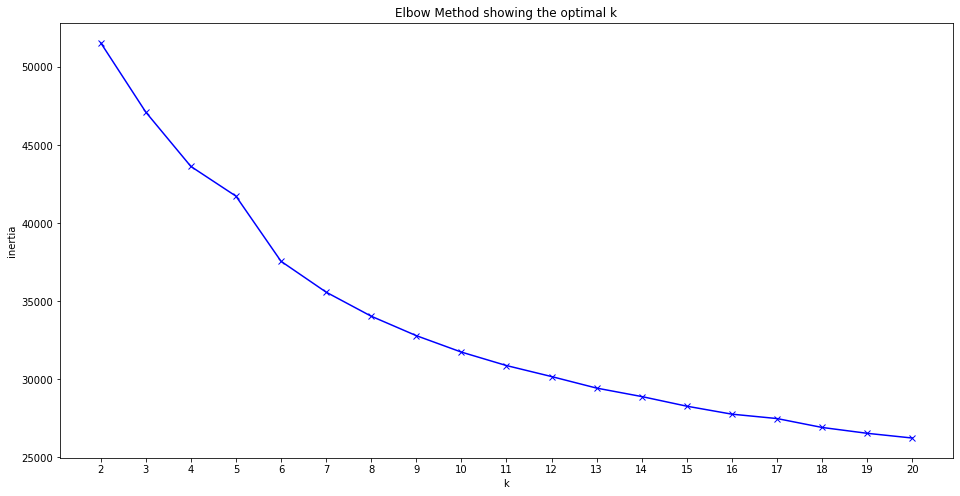

In [363]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} neighbours! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(Full_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#### Elbow at 8

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

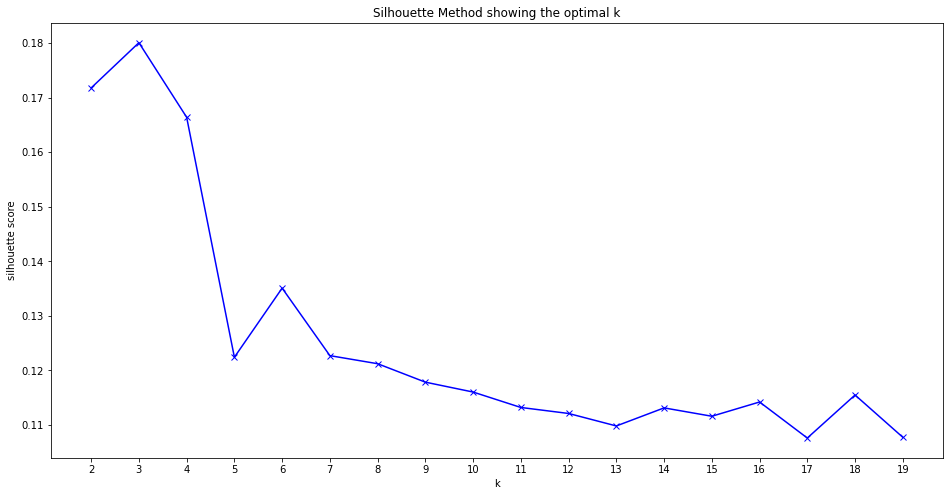

In [364]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(Full_scaled_df)
    #filename = "/content/drive/MyDrive/kmeans_" + str(k) + ".pickle" 
    #with open(filename, "wb") as f:
        #pickle.dump(kmeans,f)
    silhouette.append(silhouette_score(Full_scaled_df, kmeans.predict(Full_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [370]:
kmeans2 = KMeans(n_clusters=6,
                init="random",
                n_init=3,  
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans2.fit(Full_scaled_df)
print(kmeans2)


KMeans(algorithm='full', init='random', max_iter=2, n_clusters=6, n_init=3,
       random_state=1234, tol=0)


In [379]:
df_full['cluster'] = kmeans2.predict(Full_scaled_df)

In [486]:
kmeans2.inertia_

41419.262521152305

In [380]:
df_full['cluster'].value_counts()

1    1434
4    1139
5     912
2     904
0     540
3     466
Name: cluster, dtype: int64

In [448]:
df_full = df_full.reset_index()

In [444]:
df_full.columns

Index(['Song', 'Artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url',
       'duration_ms', 'time_signature', 'cluster', 'is_hot'],
      dtype='object')

In [445]:
df_full['is_hot'] = 0

df_full.iloc[0:100,-1] = 1

In [449]:
df_full['is_hot']

0       1
1       1
2       1
3       1
4       1
       ..
5390    0
5391    0
5392    0
5393    0
5394    0
Name: is_hot, Length: 5395, dtype: int64

In [450]:
df_full.loc[:,'is_hot'] 

0       1
1       1
2       1
3       1
4       1
       ..
5390    0
5391    0
5392    0
5393    0
5394    0
Name: is_hot, Length: 5395, dtype: int64

In [451]:
df_full['is_hot'].value_counts()

0    5295
1     100
Name: is_hot, dtype: int64

## PICKLE RICK


In [371]:
import pickle

with open(r"..\WEEK 3\scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open(r"..\WEEK 3\kmeans_6.pickle", "wb") as f:
    pickle.dump(kmeans2,f)
#r"/work/datasets/Sights.csv"
#C:\Users\Emanuele\Desktop\IRONHACK\BOOTCAMPO\PROJECTS\WEEK 3
#    r"..\WEEK 3\scaler.csv"

In [372]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
    except FileNotFoundError: 
        print("File not found!") 


In [750]:
scaler2 = load("..\WEEK 3\scaler.pickle")
scaler2

StandardScaler()

In [374]:
kMeans_6_v2 = load("..\WEEK 3\kmeans_6.pickle")
kMeans_6_v2

KMeans(algorithm='full', init='random', max_iter=2, n_clusters=6, n_init=3,
       random_state=1234, tol=0)

# INPUT

#### New data frame with lower case so song_input is less sensitive -(low_check_df)- 

In [665]:
## Creating new dataframes so I can retrieve just what needed AND makes song_input not case sensitive.
#Needed: We get if the song_input is in Top100, Cluster number and index. Call the main data frame 


df_full_check_test = df_full.copy()

df_full_check_test

low_check_df = df_full_check_test[["Song", "Artist","is_hot", "cluster"]].reset_index() # DF WITH ONLY THOSE VALUES 

low_check_df = low_check_df.applymap(lambda s:s.lower() if type(s) == str else s)

low_check_df


index                                  Song  \
0         0                                butter   
1         1                              good 4 u   
2         2                            levitating   
3         3                               peaches   
4         4                   leave the door open   
...     ...                                   ...   
5390   5390                       hermit the frog   
5391   5391                               deja vu   
5392   5392                     whole lotta money   
5393   5393  slumber party (feat. princess nokia)   
5394   5394                             telepatía   

                                              Artist  is_hot  cluster  
0                                                bts       1        2  
1                                     olivia rodrigo       1        4  
2                          dua lipa featuring dababy       1        4  
3     justin bieber featuring daniel caesar & giveon       1        1  
4           silk sonic (bruno mars & anderson .paak)       1        1  
...                                              ...     ...      ...  
5390                                          marina       0        1  
5391                                  olivia rodrigo       0        3  
5392                                             bia       0        0  
5393                                        ashnikko       0        2  
5394                                      kali uchis       0        2  

[5395 rows x 5 columns]

## INPUT AND RECOMMENDER FOR TOP 100 HOTTEST SONGS

In [668]:
testf = low_check_df[['Song','Artist']]
testf

Song  \
0                                   butter   
1                                 good 4 u   
2                               levitating   
3                                  peaches   
4                      leave the door open   
...                                    ...   
5390                       hermit the frog   
5391                               deja vu   
5392                     whole lotta money   
5393  slumber party (feat. princess nokia)   
5394                             telepatía   

                                              Artist  
0                                                bts  
1                                     olivia rodrigo  
2                          dua lipa featuring dababy  
3     justin bieber featuring daniel caesar & giveon  
4           silk sonic (bruno mars & anderson .paak)  
...                                              ...  
5390                                          marina  
5391                                  olivia rodrigo  
5392                                             bia  
5393                                        ashnikko  
5394                                      kali uchis  

[5395 rows x 2 columns]

In [800]:
#testf = low_check_d['Song','Artist']


hot_check_list = low_check_df.loc[low_check_df['is_hot'] == 1 , 'Song'].to_list()

not_hot_check_list = low_check_df.loc[low_check_df['is_hot'] == 0 , 'Song'].to_list()


def input_recommender():
    song_input = input('Please enter song name:').lower()
    
    artist_input = input('Please enter artist name:').lower()
    
    if song_input in hot_check_list:
        #print('eeeee')
        hot_index_input = hot_check_list.index(song_input)
        #print(hot_index)    ###### this is index of INPUT IN LIST - Link it to the df!!!!
        hot_cluster_input = low_check_df['cluster'][hot_index_input]
        #print(hot_cluster)  ##########  CLUSTER OF SONG_INPUT
        Recom_hot = df_full[(df_full['is_hot'] == 1) & (df_full['cluster'] == hot_cluster_input)].sample() # MOAR SONGS
        Hot_Feedback = Recom_hot['Song'].iloc[0] + ' by ' + Recom_hot['Artist'].iloc[0]
        print('Great choice! Maybe you could listen to:', Hot_Feedback)
        linkhot = Recom_hot['id'].iloc[0]#df_full.iloc[Recom_hot['id'].iloc[0]]['id']
        print(f'Link of recommended song: https://open.spotify.com/track/{linkhot}')





    elif song_input in not_hot_check_list: ###### remember here the index is 'wrong' [0] corresponds to [0 + 100] in the original DF
        #print('aaaaa')
        not_hot_index_input = not_hot_check_list.index(song_input)
        not_hot_index_input = not_hot_index_input + 100
        #print(not_hot_index_input)
        #print(hot_index)    ###### this is index of INPUT IN LIST - Link it to the df!!!!
        not_hot_cluster_input = low_check_df['cluster'][not_hot_index_input]
        #print(not_hot_cluster_input)  ##########  CLUSTER OF SONG_INPUT
        #df_full[(df_full['is_hot'] == 0) & (df_full['cluster'] == not_hot_cluster_input)].sample()
        Recom_not_hot = df_full[(df_full['is_hot'] == 0) & (df_full['cluster'] == not_hot_cluster_input)].sample() # MOAR SONGS
        #print(Recom_not_hot)
        Not_hot_Feedback = Recom_not_hot['Song'].iloc[0] + ' by ' + Recom_not_hot['Artist'].iloc[0]
        #print(Not_hot_Feedback)
        print('Amazing music taste! Maybe you could listen to:', Not_hot_Feedback)
        #df_full.iloc[2954]['id']
        linknot = Recom_not_hot['id'].iloc[0]
        print(f'Link of recommended song: https://open.spotify.com/track/{linknot}')

    
    elif not song_input in not_hot_check_list and not_hot_check_list: ### USER INPUTS A SONG NOT IN TOP-100 OR PLAYLIST
        query = song_input
        search = sp.search(q=query, type="track")
        uri = search["tracks"]["items"][0]["uri"]
       
        audio_feat_dict_input = sp.audio_features(uri)[0]
        audio_feat_dict_input = { key:[value] for key, value in audio_feat_dict_input.items() }

        df_feats_input = pd.DataFrame(audio_feat_dict_input)
        #display(df_feats_input) ######################################## AUDIO FEATURES OF USER'S INPUT NOT IN TOP100 OR PLAYLIST

        df_feats_input1 = df_feats_input[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

        scaled_input = pd.DataFrame(scaler2.transform(df_feats_input1), columns = df_feats_input1.columns)

        cluster_input = kMeans_6_v2.predict(scaled_input)

        cluster_input = cluster_input[0]

        Recommendation = df_full[(df_full['cluster'] == cluster_input)].sample() # MOAR SONGS

        print("¨Beautiful choice! Maybe you could listen to {} by {}".format(Recommendation['Song'].values[0],Recommendation['Artist'].values[0]))
        linkrec = Recommendation['id'].iloc[0]
        print(f'Link of recommended song: https://open.spotify.com/track/{linkrec}')
    
    
    
    else:    
        #print('Song not found, please try again')
        input_recommender()
            

input_recommender()   

Please enter song name:BUTTER
Please enter artist name:BTS
Great choice! Maybe you could listen to: Telepatia by Kali Uchis
Link of recommended song: https://open.spotify.com/track/6tDDoYIxWvMLTdKpjFkc1B


In [784]:
Recom_hot

index        Song         Artist  danceability  energy  key  loudness  \
23     23  Heat Waves  Glass Animals         0.761   0.525   11      -6.9   

    mode  speechiness  acousticness  ...  tempo            type  \
23     1       0.0944          0.44  ...  80.87  audio_features   

                        id                                   uri  \
23  3USxtqRwSYz57Ewm6wWRMp  spotify:track:3USxtqRwSYz57Ewm6wWRMp   

                                           track_href  \
23  https://api.spotify.com/v1/tracks/3USxtqRwSYz5...   

                                         analysis_url duration_ms  \
23  https://api.spotify.com/v1/audio-analysis/3USx...      238805   

   time_signature cluster  is_hot  
23              4       2       1  

[1 rows x 23 columns]

query = 'Butter'

search = sp.search(q=query, type="track")
uri = search["tracks"]["items"][0]["uri"]
print(uri)
audio_feat_dict_input = sp.audio_features(uri)[0]
audio_feat_dict_input = { key:[value] for key, value in audio_feat_dict_input.items() }

df_feats_input = pd.DataFrame(audio_feat_dict_input)
display(df_feats_input) ######################################## AUDIO FEATURES OF USER'S INPUT NOT IN TOP100 OR PLAYLIST

df_feats_input1 = df_feats_input[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

scaled_input = pd.DataFrame(scaler2.transform(df_feats_input1), columns = df_feats_input1.columns)

cluster_input = kMeans_6_v2.predict(scaled_input)

cluster_input = cluster_input[0]

Recommendation = df_full[(df_full['cluster'] == cluster_input)].sample()

print("¨May be you would also like the song {} from artist {}".format(Recommendation['Song'].values[0],Recommendation['Artist'].values[0]))
#Recommendation
#print('AAAAAAAAAAA')
#print(cluster_input)

#'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',

#### BACKUP INPUT

#song_input = input('Please enter song name:').lower()
#artist_input = input('Please enter artist name:')

hot_check_list = low_check_df.loc[low_check_df['is_hot'] == 1 , 'Song'].to_list()

not_hot_check_list = low_check_df.loc[low_check_df['is_hot'] == 0 , 'Song'].to_list()


def input_recommender():
    song_input = input('Please enter song name:').lower()
    
    artist_input = input('Please enter artist name:').lower()
    
    if song_input in hot_check_list:
        #print('eeeee')
        hot_index_input = hot_check_list.index(song_input)
        #print(hot_index)    ###### this is index of INPUT IN LIST - Link it to the df!!!!
        hot_cluster_input = low_check_df['cluster'][hot_index_input]
        #print(hot_cluster)  ##########  CLUSTER OF SONG_INPUT
        Recom_hot = df_full[(df_full['is_hot'] == 1) & (df_full['cluster'] == hot_cluster_input)].sample()
        Hot_Feedback = Recom_hot['Song'].iloc[0] + ' by ' + Recom_hot['Artist'].iloc[0]
        print('Great choice! Maybe you could listen to:', Hot_Feedback)
        link = Recom_hot['id'].iloc[0]#df_full.iloc[Recom_hot['id'].iloc[0]]['id']
        print(f'Link of recommended song: https://open.spotify.com/track/{link}')





    elif song_input in not_hot_check_list: ###### remember here the index is 'wrong' [0] corresponds to [0 + 100] in the original DF
        #print('aaaaa')
        not_hot_index_input = not_hot_check_list.index(song_input)
        not_hot_index_input = not_hot_index_input + 100
        #print(not_hot_index_input)
        #print(hot_index)    ###### this is index of INPUT IN LIST - Link it to the df!!!!
        not_hot_cluster_input = low_check_df['cluster'][not_hot_index_input]
        #print(not_hot_cluster_input)  ##########  CLUSTER OF SONG_INPUT
        #df_full[(df_full['is_hot'] == 0) & (df_full['cluster'] == not_hot_cluster_input)].sample()
        Recom_not_hot = df_full[(df_full['is_hot'] == 0) & (df_full['cluster'] == not_hot_cluster_input)].sample()
        #print(Recom_not_hot)
        Not_hot_Feedback = Recom_not_hot['Song'].iloc[0] + ' by ' + Recom_not_hot['Artist'].iloc[0]
        #print(Not_hot_Feedback)
        print('Great choice! Maybe you could listen to:', Not_hot_Feedback)
        #df_full.iloc[2954]['id']
        link = Recom_not_hot['id'].iloc[0]
        print(f'Link of recommended song: https://open.spotify.com/track/{link}')

    
    elif: ### USER INPUTS A SONG NOT IN TOP-100 OR PLAYLIST
        
        
    
    
    
    else:    
        input_recommender()
            

input_recommender()   

In [656]:
Recom_hot['id'].iloc[0]

'3USxtqRwSYz57Ewm6wWRMp'

In [711]:
df_full['cluster'].iloc[0]

2

In [607]:
df_full.iloc[not_hot_index_input]['id']

'75ZvA4QfFiZvzhj2xkaWAh'

In [553]:
Recom_hot['Artist'].iloc[0] - i fall apart - the heart wants what it wants

'Polo G'

In [599]:
df_full.iloc[2954]['id']

'75ZvA4QfFiZvzhj2xkaWAh'

In [571]:
x = 'The Heart Wants What It Wants'
x.lower()

'the heart wants what it wants'

In [522]:
hot_cluster_input

2

In [524]:
hot_index_input

0

In [526]:
df_full.iloc[hot_index_input]

index                                                               0
Song                                                           Butter
Artist                                                            BTS
danceability                                                    0.759
energy                                                          0.459
key                                                                 8
loudness                                                       -5.187
mode                                                                1
speechiness                                                    0.0948
acousticness                                                  0.00323
instrumentalness                                                  0.0
liveness                                                       0.0906
valence                                                         0.695
tempo                                                         109.997
type                

In [592]:
# ORGINAL SAMPLE FUNCTION
#df_full_ready_test[df_full_ready_test['cluster'] == 7].sample()

####### FUNCTION TO RETRIEVE THE SONG FROM ORIGINAL DF WITH TOP100 AND PLAYLIST 

#top100_df
#df_full[df_full['cluster'] == hot_cluster_input].sample()



df_full[(df_full['is_hot'] == 1) & (df_full['cluster'] == hot_cluster_input)].sample()

df_full[(df_full['is_hot'] == 0) & (df_full['cluster'] == not_hot_cluster_input)].sample()

index                                  Song      Artist  danceability  \
4526   4426  Let Me Know (I Wonder Why Freestyle)  Juice WRLD         0.635   

      energy  key  loudness  mode  speechiness  acousticness  ...    tempo  \
4526   0.537    7    -7.895     0       0.0832         0.172  ...  125.028   

                type                      id  \
4526  audio_features  3wwo0bJvDSorOpNfzEkfXx   

                                       uri  \
4526  spotify:track:3wwo0bJvDSorOpNfzEkfXx   

                                             track_href  \
4526  https://api.spotify.com/v1/tracks/3wwo0bJvDSor...   

                                           analysis_url duration_ms  \
4526  https://api.spotify.com/v1/audio-analysis/3wwo...      215381   

     time_signature cluster  is_hot  
4526              4       2       0  

[1 rows x 23 columns]

index                                  Song  \
0         0                                Butter   
1         1                              Good 4 U   
2         2                            Levitating   
3         3                               Peaches   
4         4                   Leave The Door Open   
...     ...                                   ...   
5390   5290                       Hermit the Frog   
5391   5291                               deja vu   
5392   5292                     WHOLE LOTTA MONEY   
5393   5293  Slumber Party (feat. Princess Nokia)   
5394   5294                             telepatía   

                                              Artist  danceability  energy  \
0                                                BTS         0.759   0.459   
1                                     Olivia Rodrigo         0.556   0.661   
2                          Dua Lipa Featuring DaBaby         0.702   0.825   
3     Justin Bieber Featuring Daniel Caesar & Giveon         0.677   0.696   
4           Silk Sonic (Bruno Mars & Anderson .Paak)         0.586   0.616   
...                                              ...           ...     ...   
5390                                          MARINA         0.609   0.679   
5391                                  Olivia Rodrigo         0.439   0.610   
5392                                             BIA         0.897   0.371   
5393                                        Ashnikko         0.964   0.398   
5394                                      Kali Uchis         0.653   0.524   

      key  loudness  mode  speechiness  acousticness  ...    tempo  \
0       8    -5.187     1       0.0948       0.00323  ...  109.997   
1       6    -5.052     0       0.2040       0.30000  ...  168.560   
2       6    -3.787     0       0.0601       0.00883  ...  102.977   
3       0    -6.181     1       0.1190       0.32100  ...   90.030   
4       5    -7.964     1       0.0324       0.18200  ...  148.088   
...   ...       ...   ...          ...           ...  ...      ...   
5390    0    -4.545     1       0.0312       0.24300  ...  122.034   
5391    9    -7.236     1       0.1160       0.59300  ...  181.088   
5392    1    -5.019     1       0.3680       0.09040  ...   81.008   
5393   11    -8.981     0       0.0795       0.00151  ...  105.012   
5394   11    -9.016     0       0.0502       0.11200  ...   83.970   

                type                      id  \
0     audio_features  2bgTY4UwhfBYhGT4HUYStN   
1     audio_features  6PERP62TejQjgHu81OHxgM   
2     audio_features  463CkQjx2Zk1yXoBuierM9   
3     audio_features  4iJyoBOLtHqaGxP12qzhQI   
4     audio_features  7MAibcTli4IisCtbHKrGMh   
...              ...                     ...   
5390  audio_features  4Zcz6saEkOII3PlXd9gN3o   
5391  audio_features  61KpQadow081I2AsbeLcsb   
5392  audio_features  5yorXJWdBan1Vlh116ZtQ7   
5393  audio_features  11ZulcYY4lowvcQm4oe3VJ   
5394  audio_features  6tDDoYIxWvMLTdKpjFkc1B   

                                       uri  \
0     spotify:track:2bgTY4UwhfBYhGT4HUYStN   
1     spotify:track:6PERP62TejQjgHu81OHxgM   
2     spotify:track:463CkQjx2Zk1yXoBuierM9   
3     spotify:track:4iJyoBOLtHqaGxP12qzhQI   
4     spotify:track:7MAibcTli4IisCtbHKrGMh   
...                                    ...   
5390  spotify:track:4Zcz6saEkOII3PlXd9gN3o   
5391  spotify:track:61KpQadow081I2AsbeLcsb   
5392  spotify:track:5yorXJWdBan1Vlh116ZtQ7   
5393  spotify:track:11ZulcYY4lowvcQm4oe3VJ   
5394  spotify:track:6tDDoYIxWvMLTdKpjFkc1B   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...   
1     https://api.spotify.com/v1/tracks/6PERP62TejQj...   
2     https://api.spotify.com/v1/tracks/463CkQjx2Zk1...   
3     https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...   
4     https://api.spotify.com/v1/tracks/7MAibcTli4Ii...   
...                                                 ...   
5390  https://api.spotify.com/v1/tracks/4Zcz6saE

In [498]:
#len(not_hot_check_list)
#not_hot_check_list

5295

In [499]:
#len(hot_check_list)
#hot_check_list

5295

In [454]:
# checking if there are all types of clusters in top100


df_full.loc[df_full['is_hot'] == 1 , 'cluster'].value_counts()

1    29
0    24
2    15
3    14
5    10
4     8
Name: cluster, dtype: int64

In [420]:
#for i in hot_check_list:
#    if hot_check_list[i] = song_input ? 
#        index_hot = i 
        
#        use hot_check_df[index_hot] to retrieve cluster THEN randomly give back one from df_full in range(0, 100) and != to hot_check_df[index_hot]

hot_check_df_test = hot_check_df.copy()

In [789]:
df_full[(df_full['cluster'] == 2) & (df_full['is_hot'] == 1)]

index                 Song                          Artist  danceability  \
0       0               Butter                             BTS         0.759   
13     13              Rapstar                          Polo G         0.789   
23     23           Heat Waves                   Glass Animals         0.761   
24     24     Calling My Phone        Lil Tjay Featuring 6LACK         0.907   
32     32            Telepatia                      Kali Uchis         0.653   
33     33         How It Feels             Lil Baby & Lil Durk         0.788   
41     41  My Ex's Best Friend   Machine Gun Kelly X blackbear         0.731   
49     49              Lil Bit    Nelly & Florida Georgia Line         0.707   
62     62       Glad You Exist                      Dan + Shay         0.748   
65     65                  Ski              Young Thug & Gunna         0.953   
67     67        Rich Off Pain   Lil Baby, Lil Durk & Rod Wave         0.469   
92     92            4 Da Gang           42 Dugg & Roddy Ricch         0.871   
93     93            Tombstone                        Rod Wave         0.550   
98     98       If You Want To             Lil Baby & Lil Durk         0.795   
99     99         Seeing Green  Nicki Minaj, Drake & Lil Wayne         0.573   

    energy  key  loudness  mode  speechiness  acousticness  ...    tempo  \
0    0.459    8    -5.187     1       0.0948       0.00323  ...  109.997   
13   0.536    6    -6.862     1       0.2420       0.41000  ...   81.039   
23   0.525   11    -6.900     1       0.0944       0.44000  ...   80.870   
24   0.393    4    -7.636     0       0.0539       0.45100  ...  104.949   
32   0.524   11    -9.016     0       0.0502       0.11200  ...   83.970   
33   0.628   11    -5.746     0       0.1200       0.00715  ...  104.083   
41   0.675    5    -5.134     0       0.0434       0.00473  ...  124.939   
49   0.689    4    -7.097     0       0.0387       0.02550  ...  119.987   
62   0.551   11    -6.120     1       0.0349       0.23500  ...  103.953   
65   0.621    8    -7.638     0       0.2210       0.01700  ...  123.016   
67   0.613   11    -6.556     1       0.3350       0.07470  ...   72.434   
92   0.545    7   -10.489     1       0.1890       0.01430  ...  100.482   
93   0.637    8    -5.212     1       0.1630       0.59700  ...   84.448   
98   0.599    6    -7.819     1       0.1230       0.04140  ...   97.033   
99   0.867    5    -2.876     0       0.1680       0.08530  ...   74.861   

              type                      id  \
0   audio_features  2bgTY4UwhfBYhGT4HUYStN   
13  audio_features  43PGPuHIlVOc04jrZVh9L6   
23  audio_features  3USxtqRwSYz57Ewm6wWRMp   
24  audio_features  3J8EOeKLTLXORtWPpOU5bE   
32  audio_features  6tDDoYIxWvMLTdKpjFkc1B   
33  audio_features  62nb5YUYUqtYJhVPwRhCke   
41  audio_features  7kDUspsoYfLkWnZR7qwHZl   
49  audio_features  0NmuYnjETG3u3qx0OmEJev   
62  audio_features  472vIK1ldetTxRxG3ovaiY   
65  audio_features  6755DFiZ7CWe2WMdTGW5C1   
67  audio_features  6MSyik7EzWsHQjTOPLFBrr   
92  audio_features  4KIkADzoVm3A10E9qyjsQ5   
93  audio_features  5pRTz4O2qOkr5nawemy6Wb   
98  audio_features  1EXRmdtTA2IEnYGiuw9plD   
99  audio_features  1TZv3bujNaYz646eezRE91   

                                     uri  \
0   spotify:track:2bgTY4UwhfBYhGT4HUYStN   
13  spotify:track:43PGPuHIlVOc04jrZVh9L6   
23  spotify:track:3USxtqRwSYz57Ewm6wWRMp   
24  spotify:track:3J8EOeKLTLXORtWPpOU5bE   
32  spotify:track:6tDDoYIxWvMLTdKpjFkc1B   
33  spotify:track:62nb5YUYUqtYJhVPwRhCke   
41  spotify:track:7kDUspsoYfLkWnZR7qwHZl   
49  spotify:track:0NmuYnjETG3u3qx0OmEJev   
62  spotify:track:472vIK1ldetTxRxG3ovaiY   
65  spotify:track:6755DFiZ7CWe2WMdTGW5C1   
67  spotify:track:6MSyik7EzWsHQjTOPLFBrr   
92  spotify:track:4KIkADzoVm3A10E9qyjsQ5   
93  spotify:track:5pRTz4O2qOkr5nawemy6Wb   
98  spotify:track:1EXRmdtTA2IEnYGiuw9plD   
99  spotify:track:1TZv3bujNaYz646eezRE91   

                                           track_href  \
0   htt

# DEMO

[Back to Top](#Song-Recommender)

In [801]:
input_recommender()

Please enter song name:BUTTER
Please enter artist name:
Great choice! Maybe you could listen to: Seeing Green by Nicki Minaj, Drake & Lil Wayne
Link of recommended song: https://open.spotify.com/track/1TZv3bujNaYz646eezRE91
